In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

data = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/Scores/MECR/MECR.csv')
data = data.drop(columns=['Gene Pair'])

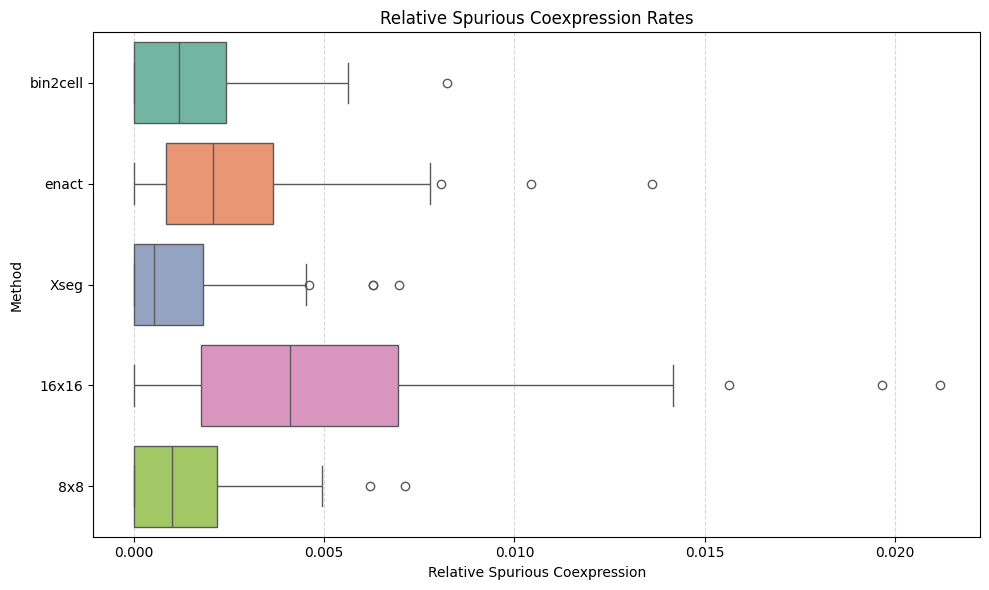

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette="Set2", orient="h")
plt.title("Relative Spurious Coexpression Rates")
plt.xlabel("Relative Spurious Coexpression")
plt.ylabel("Method")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


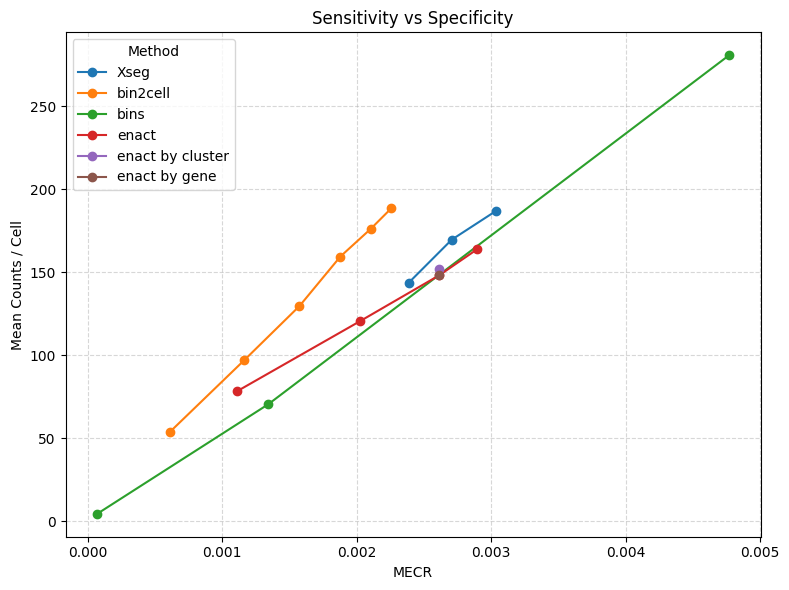

In [4]:
# Load the summary data
mecr_summary = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/Scores/MECR/MECR_summary.csv')

# Group by method and sort by mean_coexpression for line plotting
mecr_summary_sorted = mecr_summary.sort_values(['method', 'mean_coexpression'])

plt.figure(figsize=(8, 6))
for method, group in mecr_summary_sorted.groupby('method'):
    plt.plot(group['mean_coexpression'], group['mean_counts_per_cell'], marker='o', label=method)

plt.xlabel('MECR')
plt.ylabel('Mean Counts / Cell')
plt.title('Sensitivity vs Specificity')
plt.legend(title='Method')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

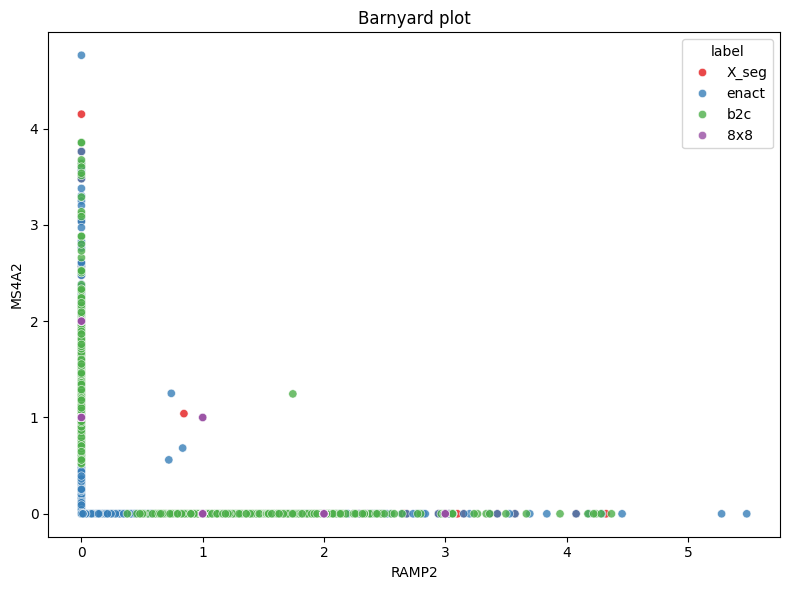

In [21]:
# Load the data
ramp2_ms4a2 = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/Scores/MECR/RAMP2_MS4A2_counts_Xseg.csv')

# Assume the first two columns are gene names, last column is the label
gene1 = ramp2_ms4a2.columns[0]
gene2 = ramp2_ms4a2.columns[1]
label_col = ramp2_ms4a2.columns[-1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ramp2_ms4a2,
    x=gene1,
    y=gene2,
    hue=label_col,
    palette='Set1',
    alpha=0.8
)
plt.xlabel(gene1)
plt.ylabel(gene2)
plt.title('Barnyard plot')
plt.legend(title=label_col)
plt.tight_layout()
plt.show()

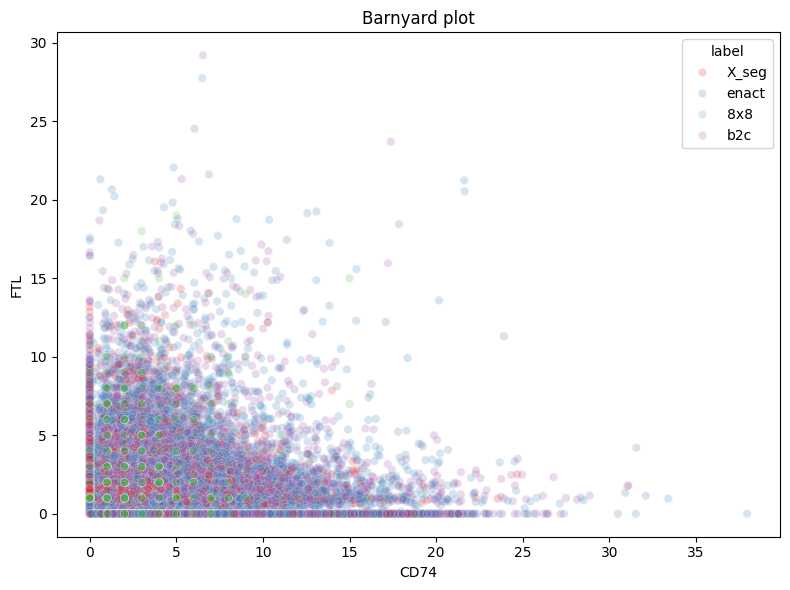

In [24]:
ramp2_ms4a2_shuffled = ramp2_ms4a2.sample(frac=1, random_state=42).reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ramp2_ms4a2_shuffled,
    x=gene1,
    y=gene2,
    hue=label_col,
    palette='Set1',
    alpha=0.2
)
plt.xlabel(gene1)
plt.ylabel(gene2)
plt.title('Barnyard plot')
plt.legend(title=label_col)
plt.tight_layout()
plt.show()
